In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

housing = fetch_california_housing()

housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df["Price"] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# make_pipeline
## 여러 전처리 단계와 모델을 하나의 흐름으로 연결해주는 도구
1. Missing value 처리
- SimpleImputer() 을 통해 누락된 값을 평균, 중앙값, 최빈값으로 채움
2. Encoding 범주형 변수
- OneHotEncoder() 나 OrdinalEncoder() 를 통해 범주형 데이터를 변환 가능
3. 정규화
- StandardScaler 와 같은 정규화 처리
4. 커스텀 전처리
- FunctionTransformer() 이용해서 직접 정의한 함수를 전처리에 삽입

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2
)

# make_pipeline 을 통해서 모델에 표준화를 자동으로 적용한다
# PolynomialFeatures 선형 입력 데이터를 비선형으로 변형
model = make_pipeline(
    PolynomialFeatures(degree=2), StandardScaler(), LinearRegression()
)
model.fit(X_train, y_train)

print(f"training Data evaluation : {model.score(X_train, y_train)}")
print(f"test Data evaluation : {model.score(X_test, y_test)}")

training Data evaluation : 0.6813081328019329
test Data evaluation : 0.6894931654928058


array([1.938, 0.959, 1.639, ..., 1.466, 3.011, 1.779], shape=(4128,))

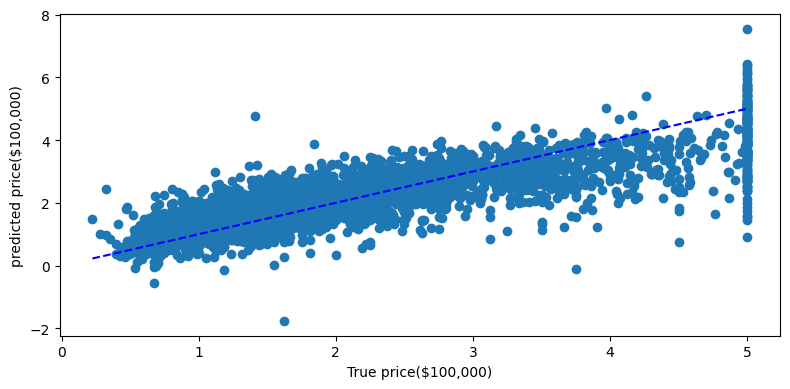

In [15]:
def plot_housing_prices(excepted, predicted):
    plt.figure(figsize=(8, 4))
    plt.scatter(excepted, predicted)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--b")
    plt.xlabel("True price($100,000)")
    plt.ylabel("predicted price($100,000)")
    plt.tight_layout()


predicted = model.predict(X_test)
expected = y_test
plot_housing_prices(expected, predicted)